Import all the Important and Required library

In [2]:
import numpy as np
import pickle
import os
import pandas as pd
import tensorflow as tf
import sklearn.metrics as metrics
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, RMSprop,SGD,Adagrad,Adadelta,Nadam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf

# converting the images into grey & blur images  and saved it into folder 

In [54]:
from PIL import Image
import os

source_folder = '/home/gdt-ws4/Documents/new_images/new_apple_grey_color/Apple___healthy'
destination_folder = '/home/gdt-ws4/Documents/new_images/new_apple_grey_color/Apple___healthy_gray'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

for image_file in image_files:
    image_path = os.path.join(source_folder, image_file)
    img = Image.open(image_path)
    
    # Convert the image to grayscale
    gray_img = img.convert('L')
    
    # Generate a new filename for the grayscale image
    gray_filename = "gray_" + image_file
    
    # Save the grayscale image in the destination folder with the new filename
    gray_destination_path = os.path.join(destination_folder, gray_filename)
    gray_img.save(gray_destination_path)
    
print("Grayscale images saved to destination folder.")


Grayscale images saved to destination folder.


In [77]:
from PIL import Image, ImageFilter
import os

source_folder = '/home/gdt-ws4/Documents/new_images/new_apple_test_color/Apple___healthy'
destination_folder = '/home/gdt-ws4/Documents/new_images/new_apple_blur_grey_color/Apple___healthy'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

image_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

for image_file in image_files:
    image_path = os.path.join(source_folder, image_file)
    img = Image.open(image_path)
    
    # Apply Gaussian blur to the image
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius=3))
    
    # Generate a new filename for the blurred image
    blurred_filename = "blur_" + image_file
    
    # Save the blurred image in the destination folder with the new filename
    blurred_destination_path = os.path.join(destination_folder, blurred_filename)
    blurred_img.save(blurred_destination_path)
    
print("Blurred images saved to destination folder.")


Blurred images saved to destination folder.


Get the Folder 

In [122]:
data_dir = 'new_apple_test_color/'

In [123]:
count = []
class_name = []
for image_class in os.listdir(data_dir):
    class_name.append(image_class)
    im = os.listdir(os.path.join(data_dir, image_class))
    count_r = len(im)
    count.append(count_r)
df = pd.DataFrame()
df['class_name'] = class_name
df['no_of_images'] = count

In [124]:
df

,class_name,no_of_images
0,Apple___Apple_scab,2016
1,Apple___healthy,2008


Plotting the figure of dataset 

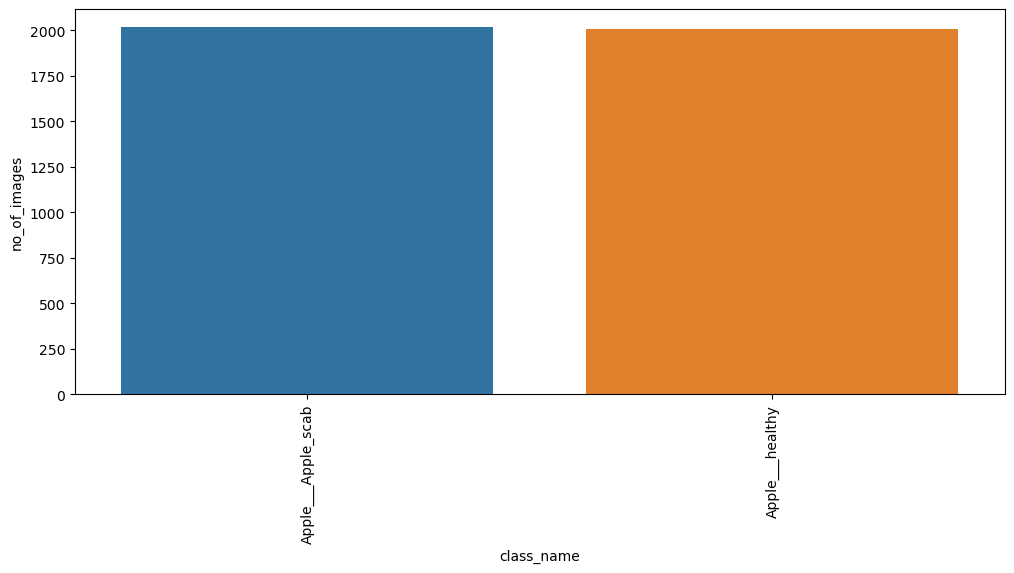

In [125]:
# names = df.class_name
# values = df.no_of_images

plt.figure(figsize=(12,5))

# plt.subplot(131)
# plt.bar(names, values)
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
# df = pd.read_csv('data.csv')

# count plot on single categorical variable
sns.barplot(y = 'no_of_images',x = 'class_name',data = df, )
plt.xticks(rotation=90)
 
# Show the plot
plt.show()

using tensorflow and keras we load the data for processing 

In [126]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir, batch_size=64,
    image_size=(64, 64),
    shuffle=True,)

Found 4024 files belonging to 2 classes.


In [127]:
import tensorflow as tf

# Assuming you have already defined 'data_dir' with the path to your dataset directory

# Create the train_data dataset using image_dataset_from_directory
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=64,
    image_size=(64, 64),
    shuffle=True
)

# Iterate over the train_data dataset to access 'X' and 'y'
for X_batch, y_batch in train_data:
    # X_batch contains the batch of images (input data)
    # y_batch contains the batch of corresponding labels (output data)

    # Here's an example of how to access the first batch of data:
    first_batch_X = X_batch
    first_batch_y = y_batch
    break  # To only access the first batch, you can remove this if you want to loop through all batches

# Now you can use 'first_batch_X' and 'first_batch_y' for further processing or training your model.


Found 4024 files belonging to 2 classes.


In [128]:
import tensorflow as tf

# Assuming you have a 'data' dataset, obtained from some data source
# For example, you can create a simple dataset for demonstration purposes:
data = tf.data.Dataset.range(10)

# Obtain the next batch as a NumPy array
batch = data.as_numpy_iterator().next()

print(batch)


0


In [129]:
image_size=(64, 64)

In [130]:
class_names = train_data.class_names
class_names


['Apple___Apple_scab', 'Apple___healthy']

Image 1 Label: 0
Image 1 class_name: Apple___Apple_scab
Image 2 Label: 1
Image 2 class_name: Apple___healthy
Image 3 Label: 1
Image 3 class_name: Apple___healthy
Image 4 Label: 1
Image 4 class_name: Apple___healthy
Image 5 Label: 1
Image 5 class_name: Apple___healthy
Image 6 Label: 0
Image 6 class_name: Apple___Apple_scab
Image 7 Label: 1
Image 7 class_name: Apple___healthy
Image 8 Label: 1
Image 8 class_name: Apple___healthy
Image 9 Label: 0
Image 9 class_name: Apple___Apple_scab
Image 10 Label: 1
Image 10 class_name: Apple___healthy
Image 11 Label: 0
Image 11 class_name: Apple___Apple_scab
Image 12 Label: 1
Image 12 class_name: Apple___healthy
Image 13 Label: 1
Image 13 class_name: Apple___healthy
Image 14 Label: 1
Image 14 class_name: Apple___healthy
Image 15 Label: 0
Image 15 class_name: Apple___Apple_scab


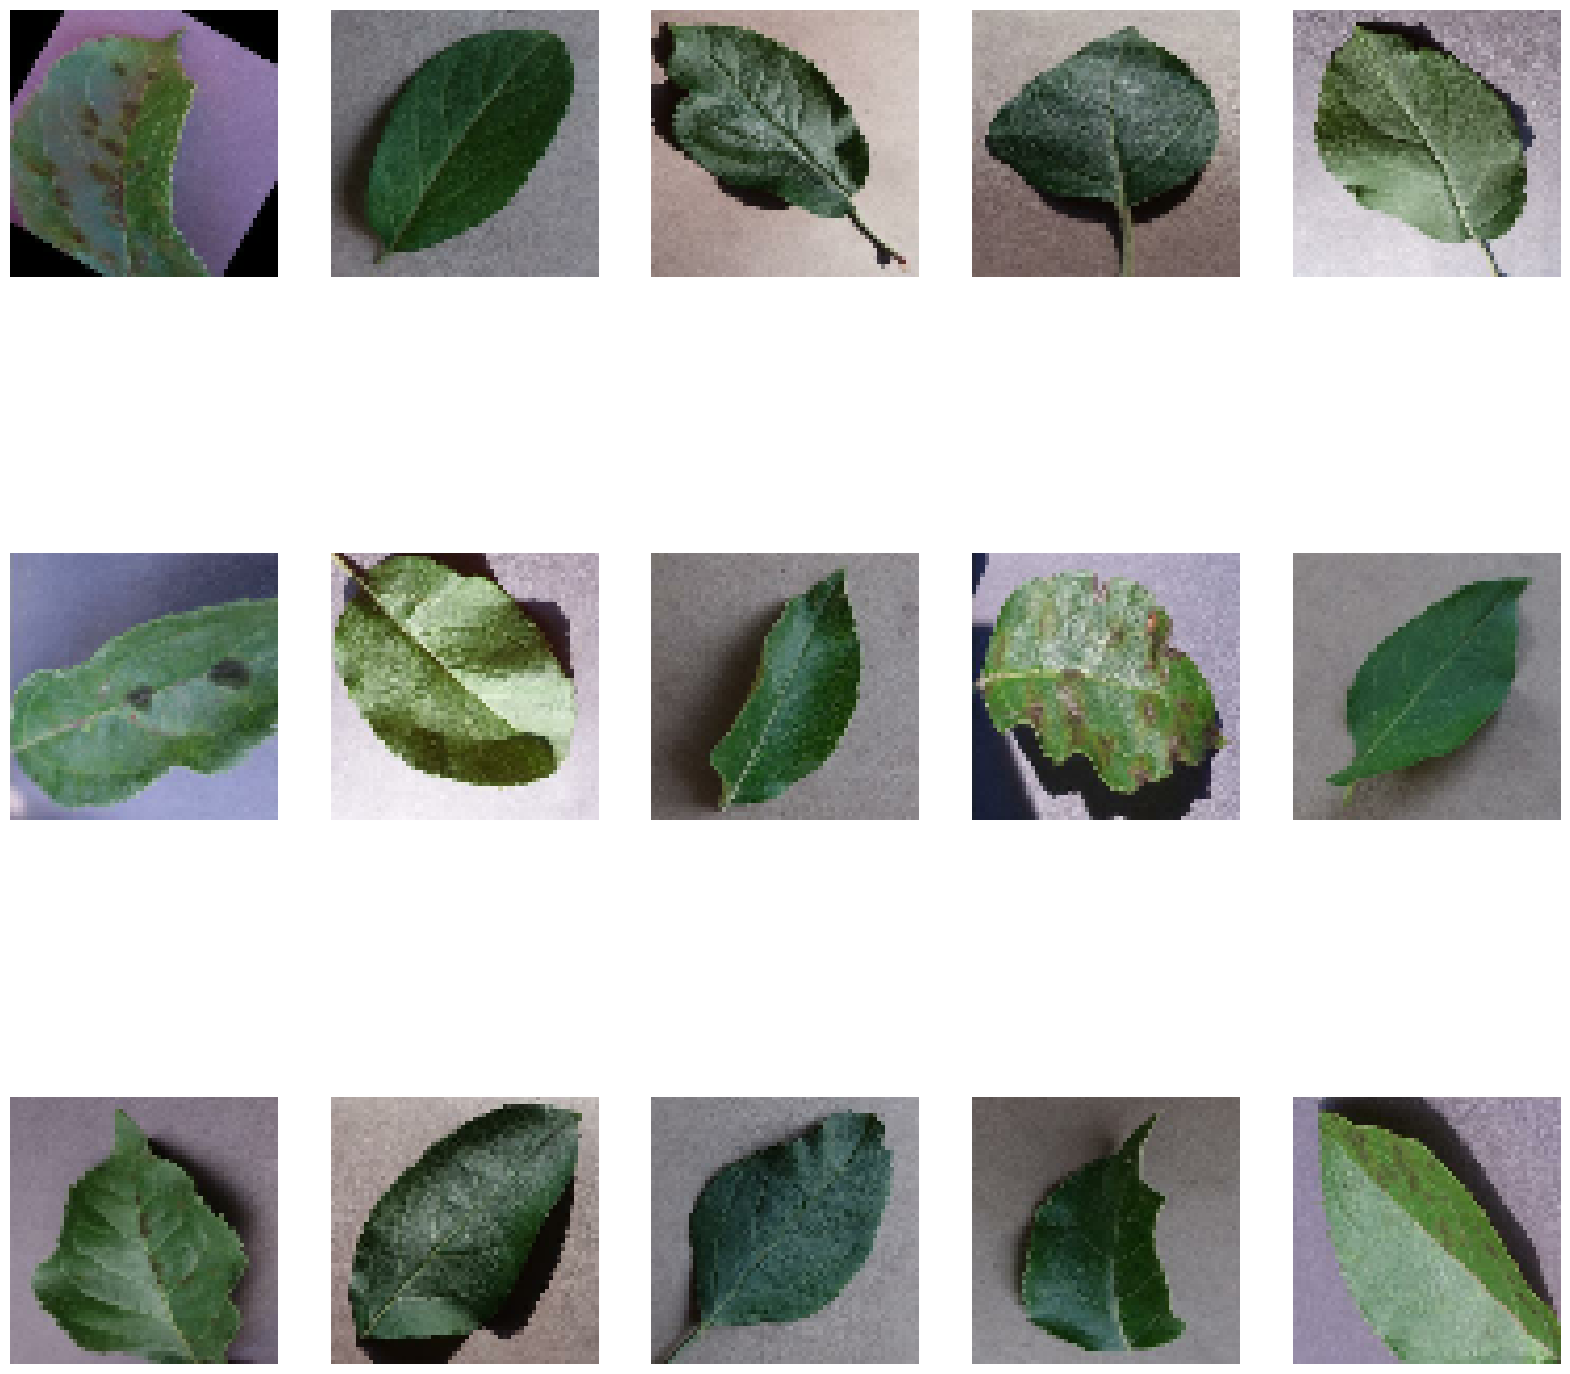

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for image_batch, labels_batch in train_data.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

        # Assuming you have a dictionary or list called 'class_names' that maps label numbers to class names
        # If not, you can directly display the numeric labels without any mapping
        label = labels_batch[i].numpy()
        class_name = class_names[labels_batch[i]]
        print("Image", i+1, "Label:", label)
        print("Image", i+1, "class_name:", class_name)


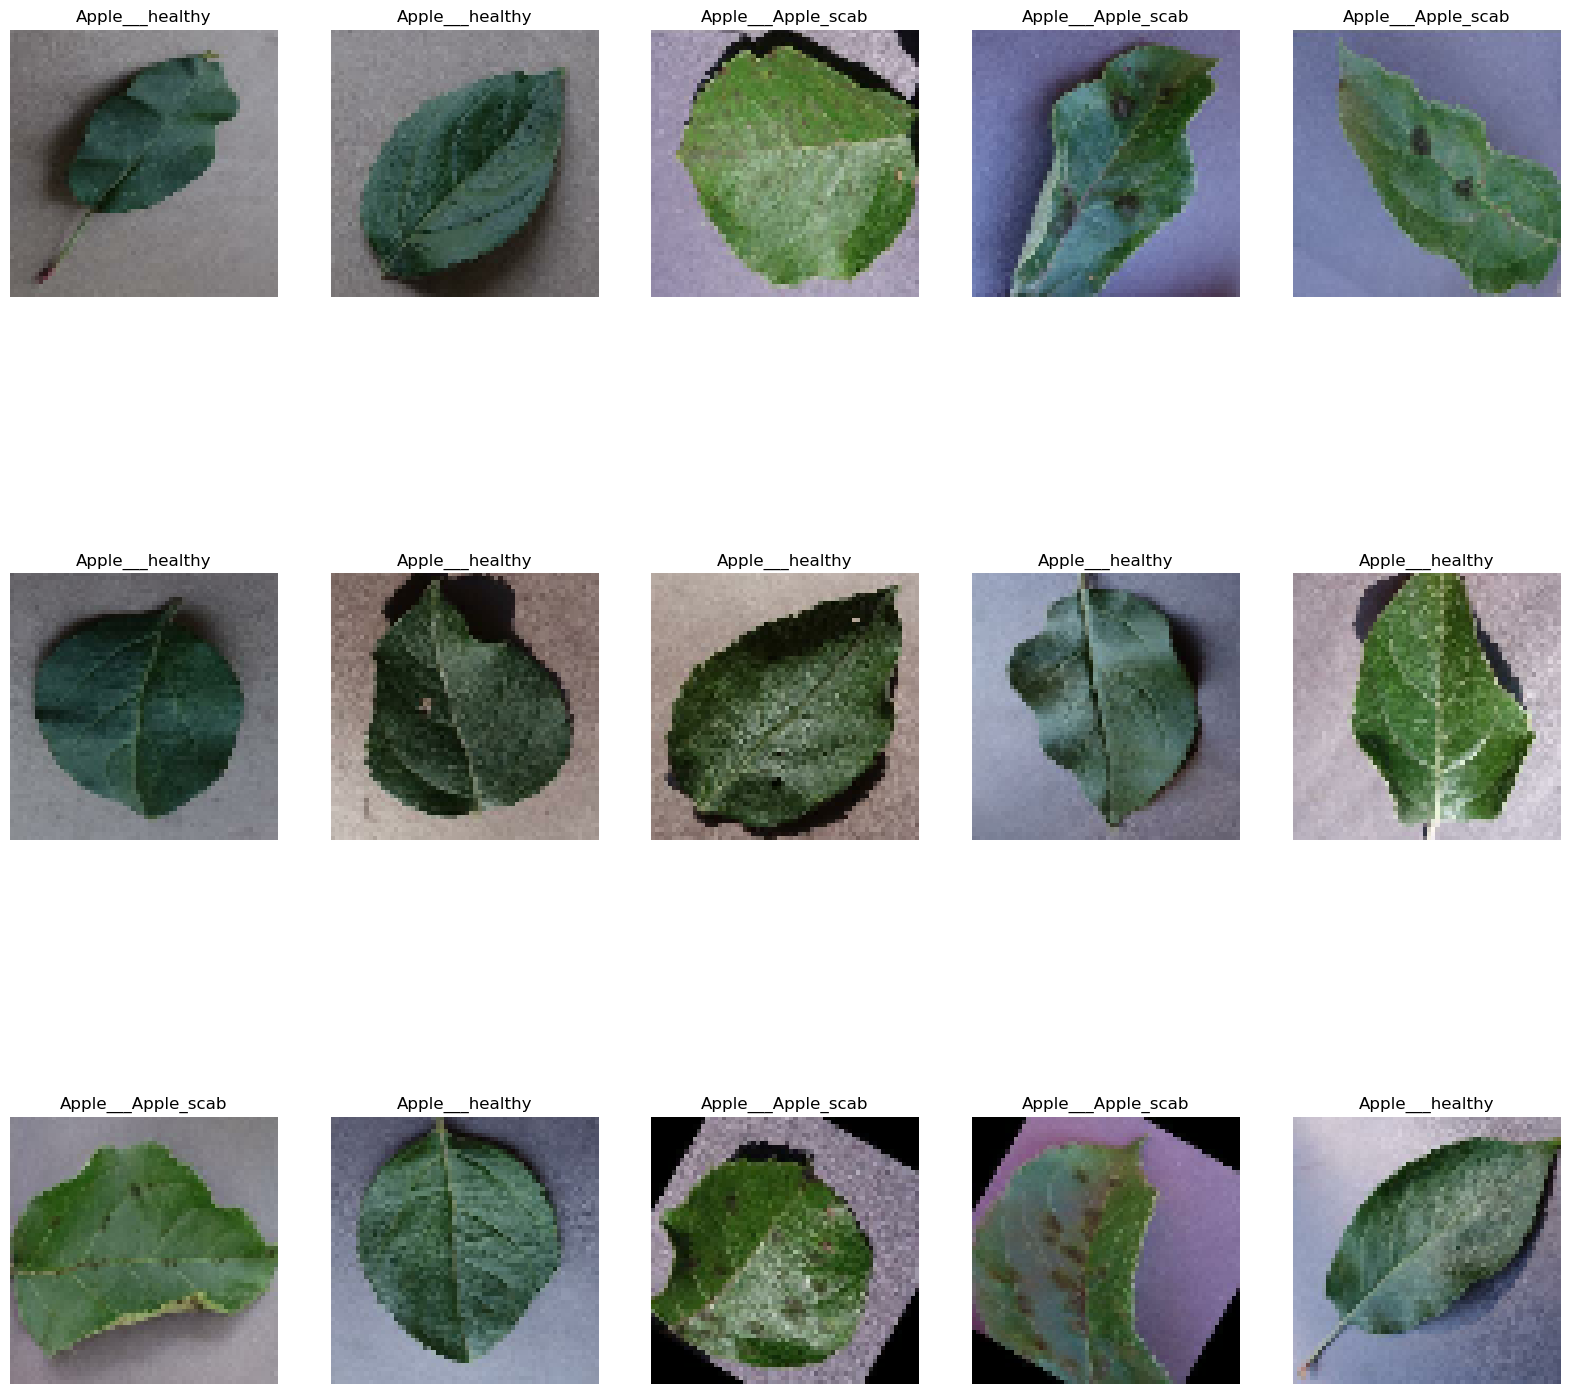

In [132]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in train_data.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [133]:
import tensorflow as tf

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

# Example usage:
 # Your training dataset, should be a TensorFlow dataset
train_generator, validation_generator, test_ds = get_dataset_partitions_tf(train_data)


In [134]:
train_generator, validation_generator, test_ds = get_dataset_partitions_tf(train_data)

In [135]:
train_generator

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [136]:
from tensorflow.keras.models import Model
inputs = tf.keras.layers.Input(shape=(64,64,3))
x =  tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x) 
model = Model(inputs=inputs, outputs=x)

In [138]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=Adagrad(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=Adadelta(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.compile(optimizer=Nadam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [95]:
r = model.fit(
        train_generator,
        epochs=60,
        validation_data=validation_generator)

Epoch 1/60
151/151 [==============================] - 5s 22ms/step - loss: 0.5292 - accuracy: 0.7663 - val_loss: 0.3656 - val_accuracy: 0.8498
Epoch 2/60
151/151 [==============================] - 3s 18ms/step - loss: 0.2898 - accuracy: 0.8718 - val_loss: 0.2765 - val_accuracy: 0.8898
Epoch 3/60
151/151 [==============================] - 3s 18ms/step - loss: 0.2291 - accuracy: 0.8996 - val_loss: 0.1826 - val_accuracy: 0.9245
Epoch 4/60
151/151 [==============================] - 3s 17ms/step - loss: 0.1732 - accuracy: 0.9300 - val_loss: 0.1661 - val_accuracy: 0.9229
Epoch 5/60
151/151 [==============================] - 3s 17ms/step - loss: 0.1584 - accuracy: 0.9361 - val_loss: 0.1387 - val_accuracy: 0.9344
Epoch 6/60
151/151 [==============================] - 3s 18ms/step - loss: 0.1387 - accuracy: 0.9455 - val_loss: 0.1147 - val_accuracy: 0.9549
Epoch 7/60
151/151 [==============================] - 3s 17ms/step - loss: 0.1219 - accuracy: 0.9511 - val_loss: 0.0789 - val_accuracy: 0.9688

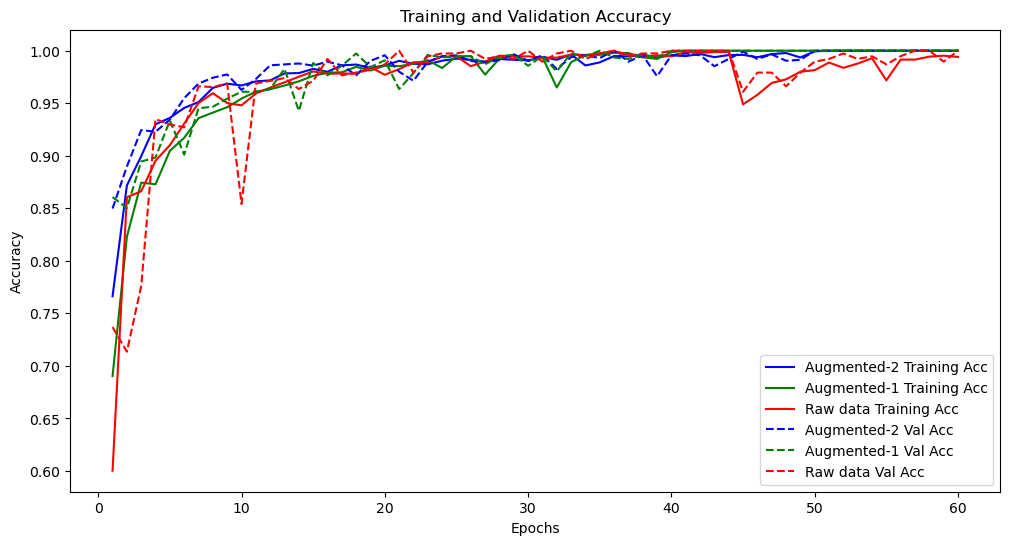

In [142]:
import matplotlib.pyplot as plt

# Assuming you have `r1`, `r2`, and `r3` which are the training histories of your three models

# Extract accuracy and validation accuracy history for each model
acc_r1 = r.history['accuracy']
val_acc_r1 = r.history['val_accuracy']

acc_r2 = r2.history['accuracy']
val_acc_r2 = r2.history['val_accuracy']

acc_r3 = r3.history['accuracy']
val_acc_r3 = r3.history['val_accuracy']

epochs = range(1, len(acc_r1) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc_r1, 'b', label='Augmented-2 Training Acc')
plt.plot(epochs, acc_r2, 'g', label='Augmented-1 Training Acc')
plt.plot(epochs, acc_r3, 'r', label='Raw data Training Acc')
plt.plot(epochs, val_acc_r1, 'b--', label='Augmented-2 Val Acc')
plt.plot(epochs, val_acc_r2, 'g--', label='Augmented-1 Val Acc')
plt.plot(epochs, val_acc_r3, 'r--', label='Raw data Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


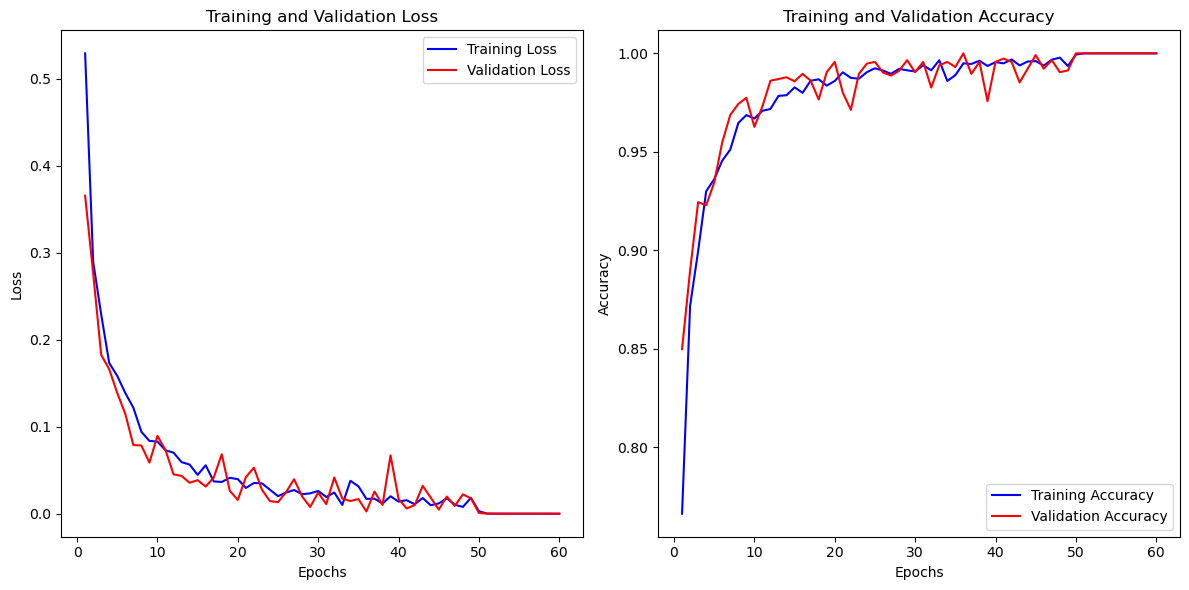

In [96]:
import matplotlib.pyplot as plt

train_loss = r.history['loss']
val_loss = r.history['val_loss']
train_accuracy = r.history['accuracy']
val_accuracy = r.history['val_accuracy']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the training and validation loss
axs[0].plot(range(1, len(train_loss) + 1), train_loss, 'b', label='Training Loss')
axs[0].plot(range(1, len(val_loss) + 1), val_loss, 'r', label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].legend()

# Plot the training and validation accuracy
axs[1].plot(range(1, len(train_accuracy) + 1), train_accuracy, 'b', label='Training Accuracy')
axs[1].plot(range(1, len(val_accuracy) + 1), val_accuracy, 'r', label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the combined plot as a single image
# plt.savefig('loss_accuracy_plot.png')

# Show the combined plot
plt.show()


In [97]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

20/20 [==============================] - 1s 6ms/step - loss: 5.8771e-06 - accuracy: 1.0000


In [98]:
print(f"Validation Accuracy: {validation_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Validation Accuracy: 1.00
Test Accuracy: 1.00


In [ ]:
scores = model.evaluate(test_ds)
scores

In [101]:
import numpy as np
from sklearn.metrics import confusion_matrix
true_labels = []
predicted_labels = []

# Iterate over the test dataset and make predictions
for images_batch, labels_batch in test_ds:
    predictions_batch = model.predict(images_batch)
    predicted_classes_batch = np.argmax(predictions_batch, axis=1)

    true_labels.extend(labels_batch.numpy())
    predicted_labels.extend(predicted_classes_batch)

# Convert the lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)
# Calculate true positives (TP), true negatives (TN), false positives (FP), false negatives (FN)
tp = confusion_mat[0][0]
fn = confusion_mat[1][0]
fp = confusion_mat[0][1]
tn = confusion_mat[1][1]
if (tn + fp) == 0:
    specificity = 0.0  # Assign a specific value when division by zero occurs
else:
    specificity = tn / (tn + fp)
if (tp + fn) == 0:
    sensitivity = 0.0  # Assign a specific value when division by zero occurs
else:
    sensitivity = tp / (tp + fn)

precission = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*(precission*recall)/(precission+recall)
# Print the results
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("True Positives (TP):", tp)
print("True Negatives (TN):", fn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", tn)

2/2 [==============================] - 0s 3ms/step
Confusion Matrix:
[[655   0]
 [  0 625]]
Specificity: 1.0
Sensitivity: 1.0
True Positives (TP): 655
True Negatives (TN): 0
False Positives (FP): 0
False Negatives (FN): 625


In [102]:
from sklearn.metrics import classification_report

# Assuming you have `y_true` and `y_pred` containing true labels and predicted labels

# Calculate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the report
print(report)

                         precision    recall  f1-score   support

Apple___Apple_scab_blur       1.00      1.00      1.00       655
        Apple___healthy       1.00      1.00      1.00       625

               accuracy                           1.00      1280
              macro avg       1.00      1.00      1.00      1280
           weighted avg       1.00      1.00      1.00      1280



In [100]:
# Initialize empty lists to store true labels and predicted labels
def plotting(test_ds,model,i):
    import numpy as np
    from sklearn.metrics import confusion_matrix
    true_labels = []
    predicted_labels = []

    # Iterate over the test dataset and make predictions
    for images_batch, labels_batch in test_ds:
        predictions_batch = model.predict(images_batch)
        predicted_classes_batch = np.argmax(predictions_batch, axis=1)

        true_labels.extend(labels_batch.numpy())
        predicted_labels.extend(predicted_classes_batch)

    # Convert the lists to NumPy arrays
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_mat)
    # Calculate true positives (TP), true negatives (TN), false positives (FP), false negatives (FN)
    tp = confusion_mat[0][0]
    fn = confusion_mat[1][0]
    fp = confusion_mat[0][1]
    tn = confusion_mat[1][1]
    if (tn + fp) == 0:
        specificity = 0.0  # Assign a specific value when division by zero occurs
    else:
        specificity = tn / (tn + fp)
    if (tp + fn) == 0:
        sensitivity = 0.0  # Assign a specific value when division by zero occurs
    else:
        sensitivity = tp / (tp + fn)

    precission = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*(precission*recall)/(precission+recall)
    # Print the results
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("True Positives (TP):", tp)
    print("True Negatives (TN):", fn)
    print("False Positives (FP):", fp)
    print("False Negatives (FN):", tn)
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    # ... (Previous code to compute confusion matrix and metrics)

    # Create a confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    # Save the figure as a picture (e.g., in PNG format)
    plt.savefig('confusion_matrix/confusion_matrix_'+str(i)+'.png', dpi=300, bbox_inches='tight')

    # Show the plot (if you want to display it interactively)
    plt.show()
    return (specificity,sensitivity,f1_score)

In [ ]:

def save_data_to_excel(data, filename):
    import openpyxl

    # Load the existing workbook or create a new one
    try:
        workbook = openpyxl.load_workbook(filename)
    except FileNotFoundError:
        workbook = openpyxl.Workbook()

    # Select the active sheet
    sheet = workbook.active

    # Find the column index for each column name
    column_indices = {}
    for col in range(1, sheet.max_column + 1):
        column_name = sheet.cell(row=1, column=col).value
        if column_name is not None:
            column_indices[column_name] = col

    # Find the next available row in the sheet
    next_row = sheet.max_row + 1

    # Write the data to the appropriate cells based on column names
    for key, value in data.items():
        if key in column_indices:
            col = column_indices[key]
            sheet.cell(row=next_row, column=col).value = value

    # Save the workbook
    workbook.save(filename)
    print("Data saved successfully!")

In [ ]:
data = {'Model_Name': model_name, 'model':'cnn','epochs':60,'accuracy':accuracy,'loss':loss,'specificity':specificity,
            'Sensitivity':sensitivity,'f1_score':f1_score,'loss function':'sparse_categorical_crossentropy','optimizer':'Nadam',
           'Disease Name':i}
save_data_to_excel(data, 'data1.xlsx')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('disease_models.h5')

In [ ]:
import numpy as np
plt.figure(figsize=(20, 20))
for images_batch, labels_batch in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        first_image = images_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()
        batch_prediction = model.predict(images_batch)
        confidence = round(100 * (np.max(batch_prediction[i])), 2)
        plt.imshow(first_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        plt.title(f"\n Predicted: {predicted_class}.\n actual label: {class_names[first_label]}.\n Confidence: {confidence}%")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined `class_names` (list of class names) and `test_ds` (test dataset).

plt.figure(figsize=(20, 20))

# Loop over the first batch of images and labels from the test dataset
for images_batch, labels_batch in test_ds.take(1):
    # Predict the probabilities for the entire batch of images
    batch_prediction = model.predict(images_batch)

    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        first_image = images_batch[i].numpy().astype('uint8')
        first_label = labels_batch[i].numpy()

        confidence = round(100 * (np.max(batch_prediction[i])), 2)  # Confidence for the current image

        plt.imshow(first_image)

        # Get the predicted class index and actual label index
        predicted_class_idx = np.argmax(batch_prediction[i])
        actual_label_idx = first_label

        # Get the predicted class name and actual label name using class_names
        predicted_class = class_names[predicted_class_idx]
        actual_label = class_names[actual_label_idx]

        # Get the full list of class probabilities for the current image
        prediction_list = batch_prediction[i]

        plt.title(f"\n Predicted: {predicted_class}.\n Actual Label: {actual_label}.\n Confidence: {confidence}%")
        print(f"Prediction List for Image {i + 1}: {prediction_list}")


Do the automation process to do the same things for all the dataset

In [3]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [4]:
from tensorflow.keras.models import Model
def make_model(train_generator,validation_generator,test_ds,i):
    inputs = tf.keras.layers.Input(shape=(64,64,3))
    x =  tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(1024,activation='relu')(x)
    x = tf.keras.layers.Dense(2, activation='softmax')(x) 
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=Nadam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    r = model.fit(
        train_generator,
        epochs=30,
        validation_data=validation_generator)
    scores = model.evaluate(test_ds)
    loss = scores[0]
    accuracy = scores[1]
    import matplotlib.pyplot as plt

    train_loss = r.history['loss']
    val_loss = r.history['val_loss']
    train_accuracy = r.history['accuracy']
    val_accuracy = r.history['val_accuracy']

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the training and validation loss
    axs[0].plot(range(1, len(train_loss) + 1), train_loss, 'b', label='Training Loss')
    axs[0].plot(range(1, len(val_loss) + 1), val_loss, 'r', label='Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Training and Validation Loss')
    axs[0].legend()

    # Plot the training and validation accuracy
    axs[1].plot(range(1, len(train_accuracy) + 1), train_accuracy, 'b', label='Training Accuracy')
    axs[1].plot(range(1, len(val_accuracy) + 1), val_accuracy, 'r', label='Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Training and Validation Accuracy')
    axs[1].legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the combined plot as a single image
    plt.savefig('loc_accuracy_disease/loss_accuracy_plot'+str(i)+'.png')

    # Show the combined plot
    plt.show()
    return(loss,accuracy,model)


In [5]:
def load_data():
    for i in os.listdir('/mnt/HDD/new_images/'):
        if 'tomato' in i or 'corn' in i or 'potato' in i or 'apple_new' in i or 'grape' in i or 'Cheery' in i:
            
            print(i)
            data_dir = str(i)
            print(data_dir)
            train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir, batch_size=32,
            image_size=(64, 64),
            shuffle=True,)
            data = train_data.map(lambda x,y: (1.0/255, y))
            batch = data.as_numpy_iterator().next()
            class_names = train_data.class_names
            print(class_names)
            train_generator, validation_generator, test_ds = get_dataset_partitions_tf(train_data)
            loss,accuracy,model = make_model(train_generator,validation_generator,test_ds,i)
            specificity,sensitivity,f1_score = plotting(test_ds,model,i)
            model_name = "new_models/disease_models/"+str(i)+".h5"
            print(model_name)
            model.save(str(i)+".h5")
            data = {'Model_Name': model_name, 'model':'cnn','epochs':60,'accuracy':accuracy,'loss':loss,'specificity':specificity,
            'Sensitivity':sensitivity,'f1_score':f1_score,'loss function':'sparse_categorical_crossentropy','optimizer':'Nadam',
           'Disease Name':i}
            save_data_to_excel(data, 'data1.xlsx')

    

Automate the folder to creating heatMap

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def extract_color_histogram(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate histogram for each channel (Hue, Saturation, Value)
    hist_hue = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    hist_value = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])

    # Concatenate histograms to create a single feature vector
    color_histogram = np.concatenate((hist_hue, hist_saturation, hist_value)).flatten()

    return color_histogram

def find_optimal_clusters(images_folder, max_clusters):
    # Load images from the specified folder
    image_files = [os.path.join(images_folder, file) for file in os.listdir(images_folder)]
    images = [cv2.imread(file) for file in image_files]

    # Extract color histograms as features
    features = [extract_color_histogram(image) for image in images]

    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Perform K-Means clustering for different values of k
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(scaled_features)
        inertias.append(kmeans.inertia_)

    # Find the "elbow" point in the plot
    deltas = np.diff(inertias)
    elbow_index = np.argmax(deltas < np.mean(deltas))

    # Get the optimal number of clusters
    optimal_clusters = elbow_index + 1

    # Plot the Elbow Method curve
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xticks(range(1, max_clusters + 1))
    plt.show()

    return optimal_clusters

def kmeans_clustering(images_folder, num_clusters):
    # Load images from the specified folder
    image_files = [os.path.join(images_folder, file) for file in os.listdir(images_folder)]
    images = [cv2.imread(file) for file in image_files]

    # Extract color histograms as features
    features = [extract_color_histogram(image) for image in images]

    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Perform K-Means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Display the clustered images
    unique_labels = set(cluster_labels)
    for label in unique_labels:
        cluster_images = [images[i] for i in range(len(cluster_labels)) if cluster_labels[i] == label]
        for img in cluster_images:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

# Specify the path to the folder containing the images and the maximum number of clusters to try
images_folder = r"/home/gdt/Desktop/Apple___Apple_scab/Apple___Apple_scab"  # Replace with the path to your images folder
max_clusters = 10

# Find the optimal number of clusters using the Elbow Method
optimal_clusters = find_optimal_clusters(images_folder, max_clusters)

# Perform K-Means clustering with the optimal number of clusters
kmeans_clustering(images_folder, optimal_clusters)


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Function to calculate dissimilarity percentage between two images
def calculate_dissimilarity(image1, image2):
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    ssim_index, _ = ssim(image1_gray, image2_gray, full=True)
    percentage_difference = (1 - ssim_index) * 100.0
    return percentage_difference

# Lists of healthy and disease image paths
healthy_image_paths = Images_healthy
disease_image_paths =Images_disease


num_rows, num_cols = len(healthy_image_paths), len(disease_image_paths)
dissimilarity_matrix = np.zeros((num_rows, num_cols))

for i, healthy_path in enumerate(healthy_image_paths):
    for j, disease_path in enumerate(disease_image_paths):
        healthy_img = cv2.imread(healthy_path)  # Load healthy image
        disease_img = cv2.imread(disease_path)  # Load disease image

        # Resize the images to the same dimensions (e.g., (256, 256))
        healthy_img_resized = cv2.resize(healthy_img, (256, 256))
        disease_img_resized = cv2.resize(disease_img, (256, 256))

        # Calculate dissimilarity between the images and store in the matrix
        dissimilarity_matrix[i, j] = calculate_dissimilarity(healthy_img_resized, disease_img_resized)

# Print the dissimilarity matrix
print("Dissimilarity Matrix:")
print(dissimilarity_matrix)
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import pandas as pd

# ... (your code above)

# Create a list of healthy image names (for column names)
healthy_image_names = [f"Healthy_{i}" for i in range(num_cols)]

# Create a DataFrame using the dissimilarity matrix
dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=disease_image_paths, columns=healthy_image_names)

# Print the dissimilarity DataFrame
print("Dissimilarity DataFrame:")
print(dissimilarity_df)


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(dissimilarity_df, cmap='viridis', annot=True, fmt='.2f', cbar=True)
plt.title('Dissimilarity Heatmap')
plt.xlabel('Healthy Images')
plt.ylabel('Disease Images')
plt.show()

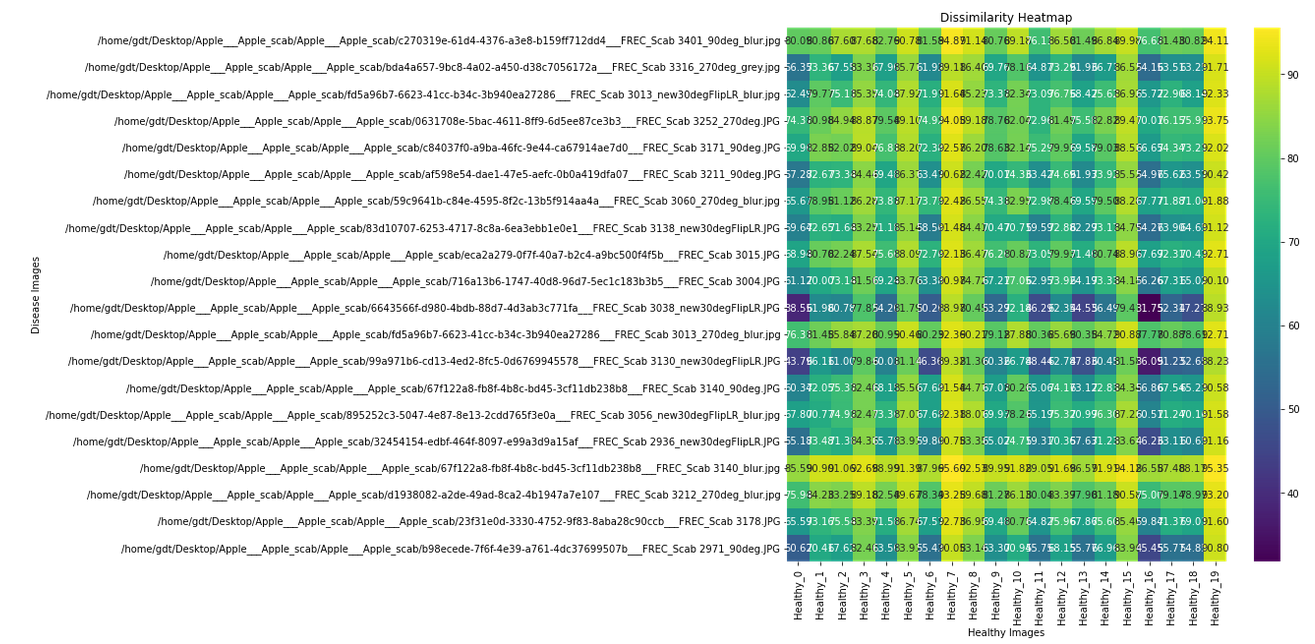